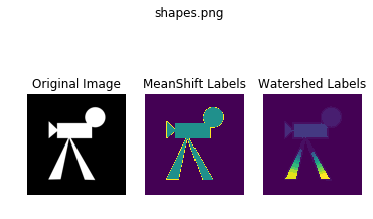

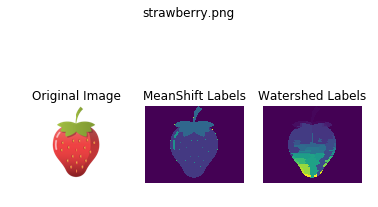

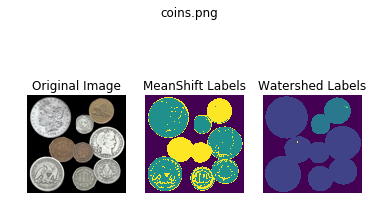

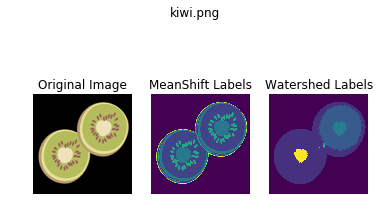

task3 start


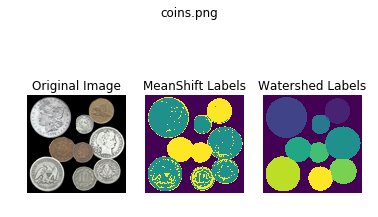

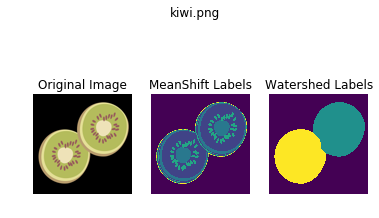

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image

size = 100, 100

img_names = ["shapes.png", "strawberry.png"]
all_names = ["shapes.png", "strawberry.png","coins.png", "kiwi.png"]
ext_names = ["coins.png", "kiwi.png"]


images = [i for i in img_names]
ext_images = [i for i in ext_names]
all_images = [i for i in all_names]

def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


# all images
for img_path in all_images:
    img = Image.open(img_path)
    img.thumbnail(size)  # Convert the image to 100 x 100
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]

    #
    # +--------------------+
    # |     Task 1         |
    # +--------------------+
    #
    # TODO: perform MeanShift on image
    # Follow the hints in the lab spec.

    # Step 1 - Extract the three RGB colour channels
    # Hint: It will be useful to store the shape of one of the colour
    # channels so we can reshape the flattened matrix back to this shape.
    
    b = img_mat[:,:,0]
    g = img_mat[:,:,1]
    r = img_mat[:,:,2]
    

    # Step 2 - Combine the three colour channels by flatten each channel 
	# then stacking the flattened channels together.
    # This gives the "colour_samples"
    #colour_samples = []
    b_fla = b.flatten()
    g_fla = g.flatten()
    r_fla = r.flatten()
    
    colour_samples = np.vstack((b_fla,g_fla,r_fla))
    colour_samples = colour_samples.transpose()
    

    # Step 3 - Perform Meanshift  clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    # Step 4 - reshape ms_labels back to the original image shape 
	# for displaying the segmentation output 
    #ms_labels = []
    
    ms_labels = ms_labels.reshape(b.shape[0],b.shape[1])
    #%%
    #
    # +--------------------+
    # |     Task 2         |
    # +--------------------+
    #

    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_array = []
    img_array = np.array(img.convert('L'))
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    #distance = []
    distance = ndi.distance_transform_edt(img_array)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    #markers = []
    m = peak_local_max(distance,indices=False, footprint=np.ones((3, 3)),labels= img_array)
    markers = ndi.label(m)[0]

    
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    #ws_labels = []
    ws_labels = watershed(-distance,markers,mask = img_array)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")

    
print("task3 start")
#%%
#
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component

#do something better
for img_path in ext_images:
    img = Image.open(img_path)
    img.thumbnail(size)
    img_mat3 = np.array(img)[:, :, :3]
    b3 = img_mat3[:,:,0]
    g3 = img_mat3[:,:,1]
    r3 = img_mat3[:,:,2]
    b_fla3 = b3.flatten()
    g_fla3 = g3.flatten()
    r_fla3 = r3.flatten()
    
    colour_samples3 = np.vstack((b_fla3,g_fla3,r_fla3))
    colour_samples3 = colour_samples3.transpose()
    

    ms_clf3 = MeanShift(bin_seeding=True)
    ms_labels3 = ms_clf3.fit_predict(colour_samples3)

    
    ms_labels3 = ms_labels3.reshape(b3.shape[0],b3.shape[1])
    
    
    
    
    
    img_grey = img.convert('L')

    # Convert to binary image, of course we can use cv2 as well
    img_grey = img_grey.point(lambda x: 0 if x < 65 else 255, '1')

    img_array3 = np.array(img_grey)
    
    distance3 = ndi.distance_transform_edt(img_array3)

    m3= peak_local_max(distance3,indices=False, footprint=np.ones((3, 3)),labels= img_array3)
    
    markers3 = ndi.label(m3)[0]
    
    
    ws_labels3 = watershed(-distance3,markers3,mask = img_array3)
    
    
    plot_three_images(img_path, img, "Original Image", ms_labels3, "MeanShift Labels",
                  ws_labels3, "Watershed Labels")

In [7]:
#task1
img = Image.open("shapes.png")
img.thumbnail(size)  # Convert the image to 100 x 100
# Convert the image to a numpy matrix
img_mat = np.array(img)[:, :, :3]



b = img_mat[:,:,0]
g = img_mat[:,:,1]
r = img_mat[:,:,2]

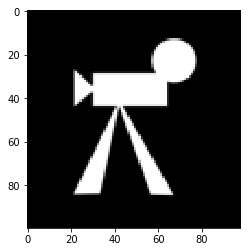

In [8]:
plt.imshow(img_mat)


In [9]:
r.shape

(100, 98)

In [10]:
b.shape

(100, 98)

In [11]:
b_fla = b.flatten()
g_fla = g.flatten()
r_fla = r.flatten()

colour_samples = np.vstack((b_fla,g_fla,r_fla))
colour_samples = colour_samples.transpose()

In [12]:
colour_samples.shape

(9800, 3)

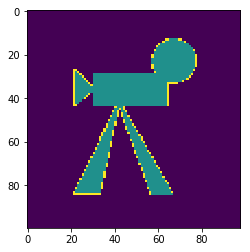

In [13]:
ms_clf = MeanShift(bin_seeding=True)
ms_labels = ms_clf.fit_predict(colour_samples)
ms_labels = ms_labels.reshape(r.shape[0],r.shape[1])
plt.imshow(ms_labels)

In [14]:
img_array = np.array(img.convert('L'))
distance = ndi.distance_transform_edt(img_array)
distance

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
m = peak_local_max(distance,indices=False, footprint=np.ones((3, 3)),labels= img_array)
markers = ndi.label(m)[0]

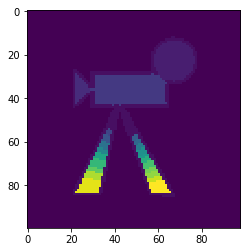

In [16]:
ws_labels = watershed(-distance,markers,mask = img_array)
plt.imshow(ws_labels)